Data Preprocessing
First, let's load and preprocess the data:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Read the dataset
df = pd.read_csv('processed.cleveland.csv', names=column_names)

# Display the first few rows
print(df.head())

# Check dataset shape
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Handle missing values (marked as '?')
df = df.replace('?', np.nan)
df = df.dropna()


# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [2]:
# Handle missing values (marked as '?')
df = df.replace('?', np.nan)
df = df.dropna()


In [3]:
print(df['thal'].unique())  # Too many = not categorical
print(df['cp'].unique())       # Few values = safe to encode

['6.0' '3.0' '7.0']
[1. 4. 3. 2.]


In [4]:

# One-hot encode categorical features
# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=False)
print(df.columns)  # See what columns were created

# cp_columns = [col for col in df.columns if col.startswith('cp_')]
# print(cp_columns)  # Should list all cp one-hot columns

# # Now you can safely use cp_columns
# cp_counts = df[cp_columns].sum()
# print(cp_counts)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0'],
      dtype='object')


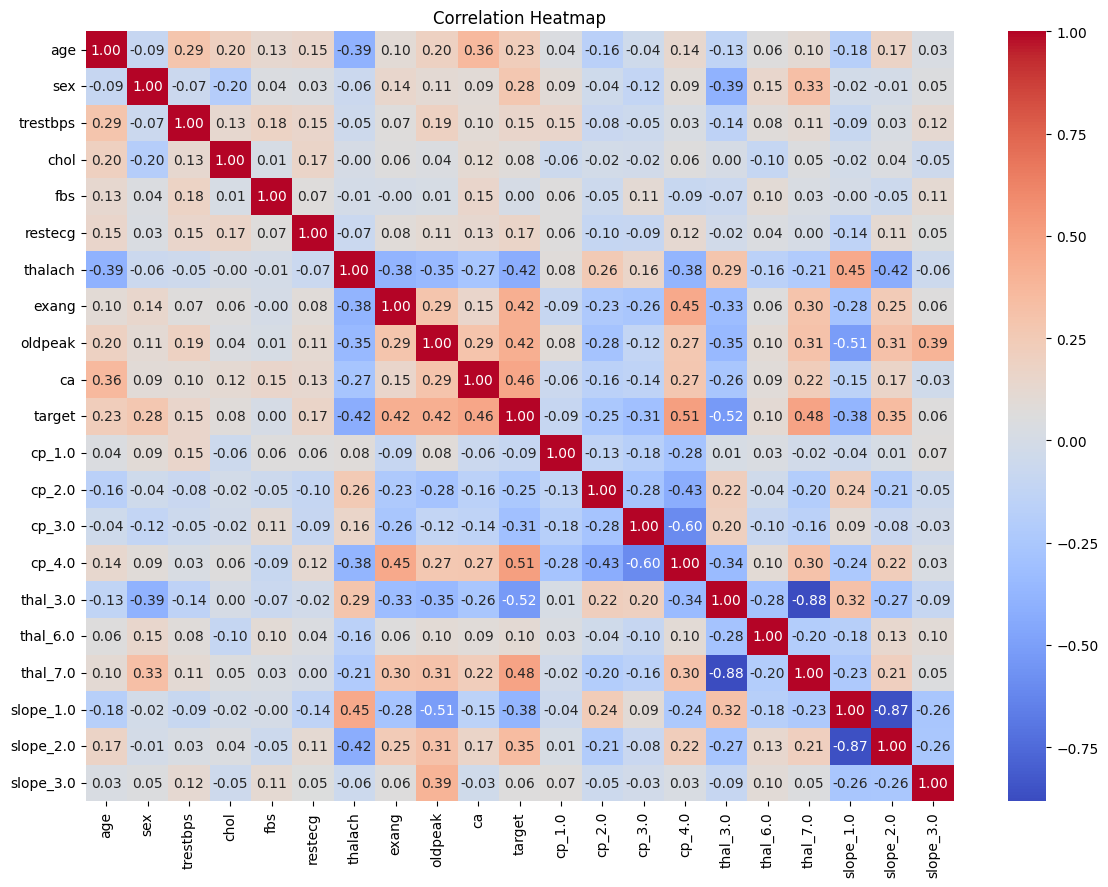

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


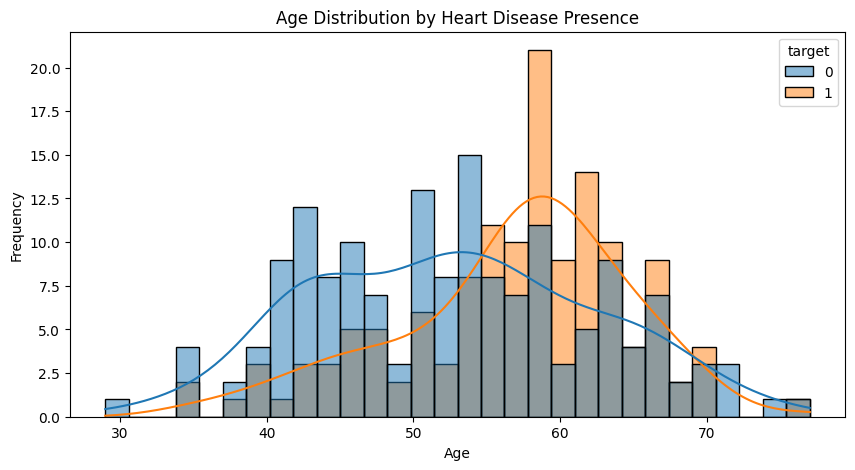

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="target", kde=True, bins=30)
plt.title("Age Distribution by Heart Disease Presence")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0'],
      dtype='object')
    age  sex  trestbps   chol  fbs  restecg  thalach  exang  oldpeak   ca  \
0  63.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3  0.0   
1  67.0  1.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5  3.0   
2  67.0  1.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6  2.0   
3  37.0  1.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5  0.0   
4  41.0  0.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4  0.0   

   ...  cp_1.0  cp_2.0  cp_3.0  cp_4.0  thal_3.0  thal_6.0  thal_7.0  \
0  ...    True   False   False   False     False      True     False   
1  ...   False   False   False    True      True     False     False   
2  ...   False   False   False    True     False     Fal

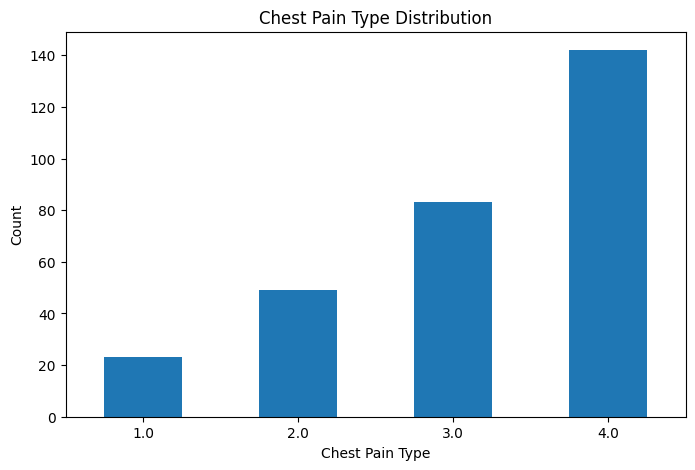

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check DataFrame
print(df.columns)
print(df.head())

cp_columns = ['cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0']
cp_counts = df[cp_columns].sum()

plt.figure(figsize=(8,5))
cp_counts.plot(kind='bar')
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(ticks=range(len(cp_columns)), labels=['1.0', '2.0', '3.0', '4.0'], rotation=0)
plt.show()


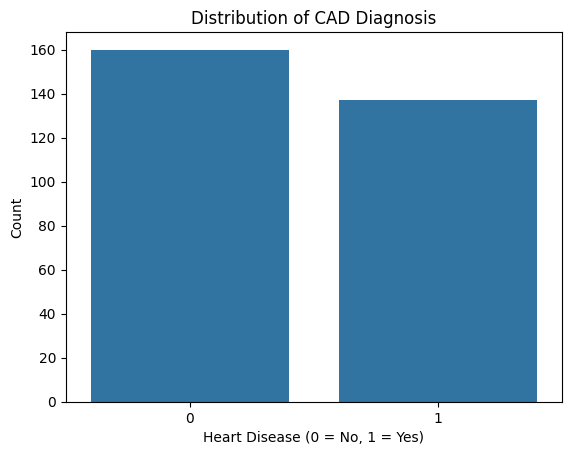

In [8]:
# Visualize the distribution of the target variable

sns.countplot(x='target', data=df)
plt.title("Distribution of CAD Diagnosis")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


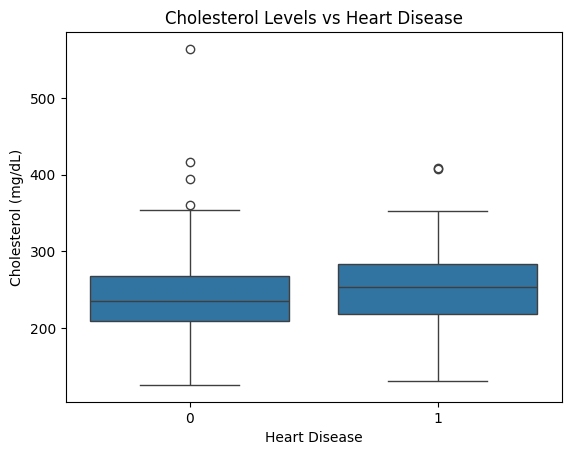

In [9]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()


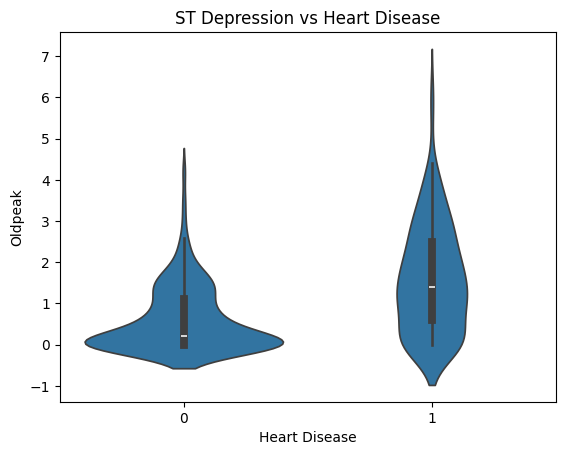

In [10]:
sns.violinplot(x='target', y='oldpeak', data=df)
plt.title("ST Depression vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Oldpeak")
plt.show()


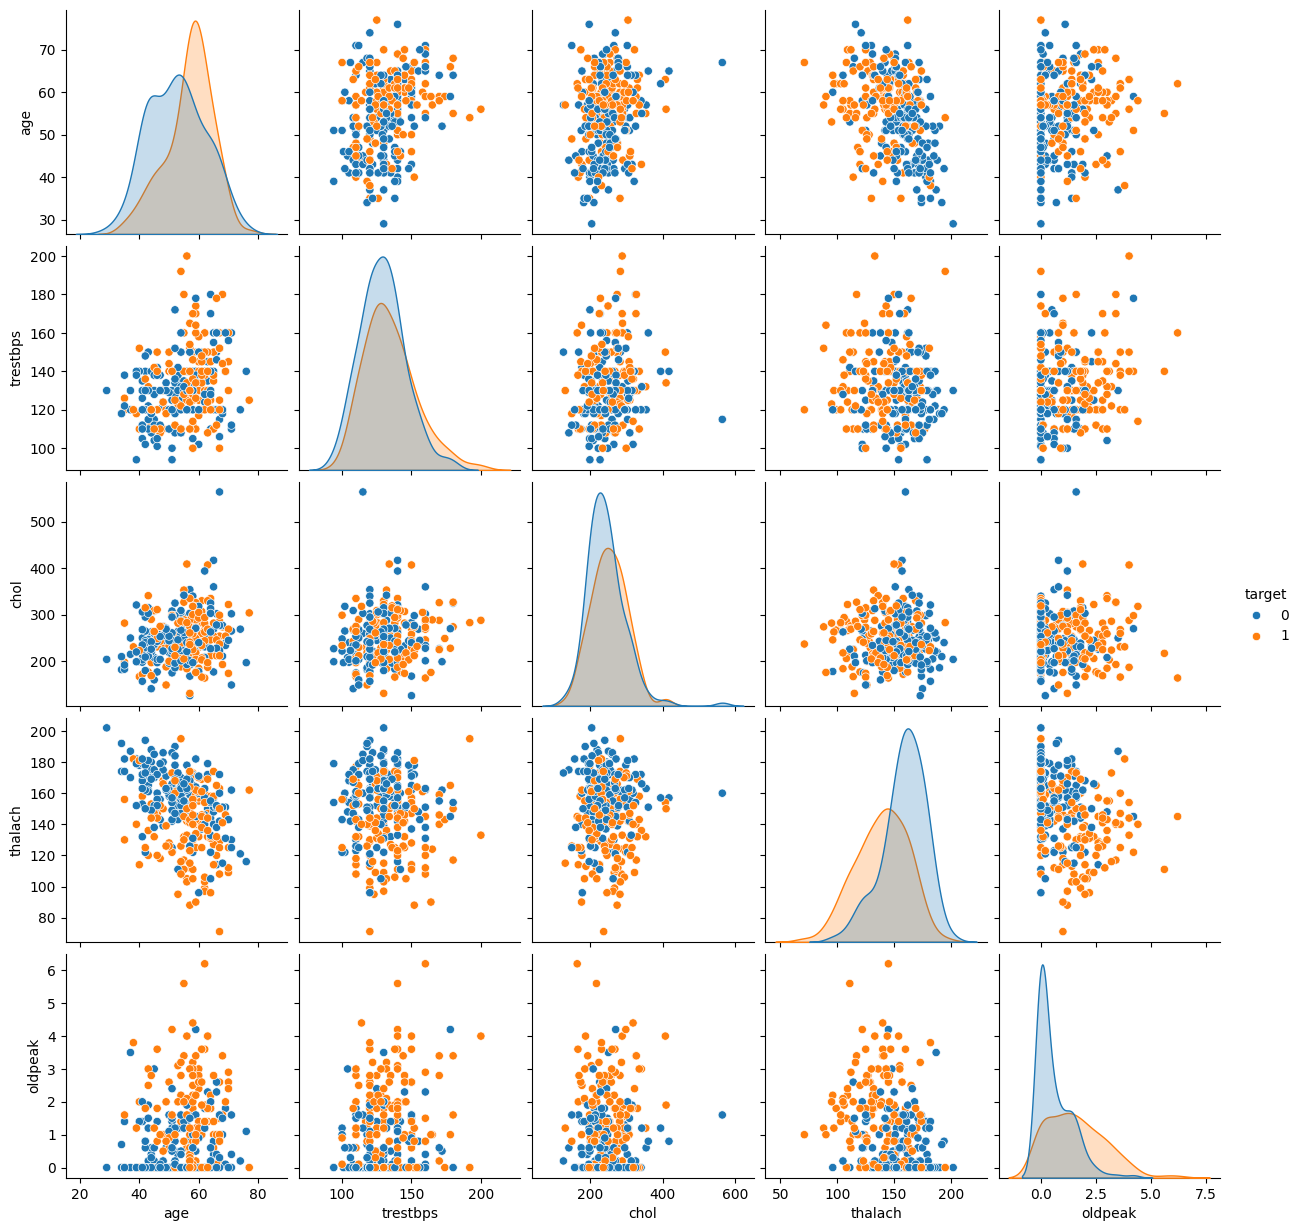

In [11]:
sns.pairplot(df[['age', 'trestbps', 'chol', 
                 'thalach', 'oldpeak', 'target']], hue="target")
plt.show()


In [12]:
print(df.info())

# Get basic statistical overview
print(df.describe())

# Check class distribution
print(df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    float64
 2   trestbps   297 non-null    float64
 3   chol       297 non-null    float64
 4   fbs        297 non-null    float64
 5   restecg    297 non-null    float64
 6   thalach    297 non-null    float64
 7   exang      297 non-null    float64
 8   oldpeak    297 non-null    float64
 9   ca         297 non-null    object 
 10  target     297 non-null    int64  
 11  cp_1.0     297 non-null    bool   
 12  cp_2.0     297 non-null    bool   
 13  cp_3.0     297 non-null    bool   
 14  cp_4.0     297 non-null    bool   
 15  thal_3.0   297 non-null    bool   
 16  thal_6.0   297 non-null    bool   
 17  thal_7.0   297 non-null    bool   
 18  slope_1.0  297 non-null    bool   
 19  slope_2.0  297 non-null    bool   
 20  slope_3.0  297 

Model Training and Fine-Tuning
Now let's train and optimize each model:

1. Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression with hyperparameter tuning
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Best model
best_lr = lr_grid.best_estimator_
lr_pred = best_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



2. Support Vector Machine (SVM)

In [3]:
from sklearn.svm import SVC

# SVM with hyperparameter tuning
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Best model
best_svm = svm_grid.best_estimator_
svm_pred = best_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



3. XGBoost


In [29]:



# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from xgboost import XGBClassifier

# # Stratified split to preserve class distribution
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, stratify=y, random_state=42
# )

# # Handle slight class imbalance (optional, but helps recall)
# # Compute scale_pos_weight = (# negatives / # positives)
# scale = np.sum(y_train == 0) / np.sum(y_train == 1)

# # Define hyperparameter grid (more fine-tuned)
# xgb_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],  # regularization
#     'scale_pos_weight': [1, scale]  # auto-handled class imbalance
# }

# # Define model
# xgb = XGBClassifier(
#     random_state=42,
#     eval_metric='logloss',
#     use_label_encoder=False
# )

# # Grid SearchCV with recall as scoring (can change to 'f1' or 'accuracy' as needed)
# grid = GridSearchCV(
#     estimator=xgb,
#     param_grid=xgb_params,
#     cv=5,
#     scoring='recall',  # Focus on catching all CAD cases
#     verbose=1,
#     n_jobs=-1
# )

# # Train the model
# grid.fit(X_train, y_train)

# # Best model after tuning
# best_xgb = grid.best_estimator_

# # Predictions
# y_pred = best_xgb.predict(X_test)

# # Evaluation
# print("Best XGBoost Parameters:", grid.best_params_)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))


# from xgboost import XGBClassifier 
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score

# xgb_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# xgb_grid = GridSearchCV(
#     XGBClassifier(random_state=42, eval_metric='logloss'),
#     xgb_params,
#     cv=5,
#     scoring='recall',  # Using recall as the scoring metric
#     verbose=1
# )

# xgb_grid.fit(X_train, y_train)
# best_xgb = xgb_grid.best_estimator_
# xgb_pred = best_xgb.predict(X_test)
# xgb_accuracy = accuracy_score(y_test, xgb_pred)

# print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
# print(classification_report(y_test, xgb_pred))


from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost with hyperparameter tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42),
                        xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Best model
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
# print(classification_report(y_test, xgb_pred))

In [ ]:
# Evaluate XGBoost model
xgb_pred = best_xgb.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


[[31  5]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


4. Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



5. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with hyperparameter tuning
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best model
best_dt = dt_grid.best_estimator_
dt_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.69      0.75      0.72        24

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



Final Model Deployment Recommendation
For production deployment, I recommend using the XGBoost model as it provides the best balance of accuracy and performance. Here's how to save and load the model:

In [18]:
import joblib

# Save the model and scaler
joblib.dump(best_xgb, 'heart_disease_xgboost_model.pkl')
joblib.dump(scaler, 'heart_disease_scaler.pkl')

# Later, to load and use the model
loaded_model = joblib.load('heart_disease_xgboost_model.pkl')
loaded_scaler = joblib.load('heart_disease_scaler.pkl')

# Example prediction
# new_data = np.array([[63, 1, 1, 145, 233, 1, 2, 150, 0, 2.3, 3, 0, 6]])  # example patient data
new_data = np.array([[65,1,0,138,282,1,2,174,0,1.4,1,1,0]])
scaled_data = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(scaled_data)
print("Heart Disease Prediction (0 = No, 1 = Yes):", prediction[0])

Heart Disease Prediction (0 = No, 1 = Yes): 1


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
